In [43]:
# Polynomail regression with Gradient searh

import numpy as np
class PolyRegression:
    """
    Polynomial Regression implemented from scratch using Mini-Batch Gradient Descent.
    Supports multi-feature inputs and arbitrary polynomial degree.
    """

    # initialize model parameters
    def __init__(self, degree=1, batch_size=32, learning_rate=0.01, epochs=1000):
        self.degree = degree
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    # create polynomial features like x, x^2, x^3 ...
    def _poly_features(self, X):

        X = np.array(X)

        # start with original x
        X_poly = X.copy()

        # add higher powers
        for d in range(2, self.degree + 1):
            X_poly = np.hstack((X_poly, X**d))

        return X_poly

    # train the model
    def fit(self, X_train, y_train):

        # transform input to polynomial form
        X_poly = self._poly_features(X_train)

        # reshape output
        y_train = np.array(y_train).reshape(-1,1)

        # number of samples and features
        m = len(y_train)
        n = X_poly.shape[1]

        # prevent batch size from exceeding dataset size
        self.batch_size = min(self.batch_size, m)


        # initialize weights and bias
        self.coef_ = np.zeros((n,1))
        self.intercept_ = 0

        # how many batches per epoch
        batches = m // self.batch_size

        for epoch in range(self.epochs):

            for _ in range(batches):

                # pick random batch
                idx = np.random.choice(m, self.batch_size, replace=False)

                xi = X_poly[idx]
                yi = y_train[idx]

                # prediction
                y_hat = xi @ self.coef_ + self.intercept_

                # error
                error = y_hat - yi

                # gradients
                dw = (2/self.batch_size) * xi.T @ error
                db = (2/self.batch_size) * np.mean(error)

                # update weights and bias
                self.coef_ -= self.learning_rate * dw
                self.intercept_ -= self.learning_rate * db

            # print loss every 200 epochs
            if epoch % 200 == 0:
                y_pred = X_poly @ self.coef_ + self.intercept_
                loss = np.mean((y_train - y_pred)**2)
                print(f"Epoch {epoch}, Loss {loss:.4f}")

    # make predictions
    def predict(self, X_test):

        # convert test data to polynomial form
        X_poly = self._poly_features(X_test)

        return X_poly @ self.coef_ + self.intercept_

    # mean squared error
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    # r2 score
    def r2_score(self, y_true, y_pred):

        y_true = np.array(y_true).reshape(-1,1)
        y_pred = np.array(y_pred).reshape(-1,1)

        # residual error
        ss_res = np.sum((y_true - y_pred)**2)

        # total variation
        ss_tot = np.sum((y_true - np.mean(y_true))**2)

        return 1 - ss_res/ss_tot


In [44]:
def train_test_split_manual(X, Y, test_size=0.2, random_state=42):
    rng = np.random.default_rng(random_state)

    X = np.array(X)
    Y = np.array(Y).reshape(-1, 1)

    n_samples = X.shape[0]

    indices = np.arange(n_samples)
    rng.shuffle(indices)

    test_count = int(n_samples * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], Y[train_idx], Y[test_idx]


In [45]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2


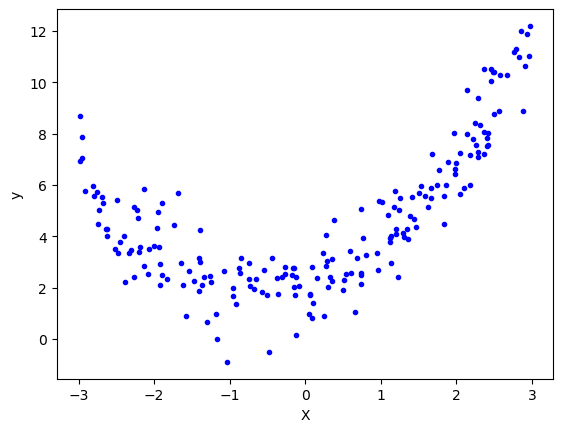

In [46]:
import matplotlib.pyplot as plt

plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2, random_state=2)

"""
    During training, gradient descent initially diverged due to large feature magnitudes.
    This was resolved by applying z-score normalization (mean=0, std=1) to input features, which significantly improved convergence stability.
"""
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std



pr = PolyRegression(degree=3, batch_size=32, learning_rate=0.0001, epochs=1000)
pr.fit(X_train, y_train)

print("Learned:", pr.coef_.ravel(), pr.intercept_)


# My gradient descent converged successfully as indicated by decreasing loss; 
# coefficient values differ from ground truth due to feature standardization.

Epoch 0, Loss 30.4733
Epoch 200, Loss 17.2355
Epoch 400, Loss 10.3869
Epoch 600, Loss 6.8722
Epoch 800, Loss 5.0559
Learned: [0.7749925  3.11801586 0.56661867] 0.08616479574917503


In [48]:
y_pred = pr.predict(X_test)

print("Predicted:", y_pred.ravel())

Predicted: [0.15173046 2.481933   6.88747606 4.74169735 0.06718416 6.53506888
 0.53867785 1.54780329 0.13234763 0.15434733 5.56233548 3.20069792
 0.19721444 1.37971527 7.11183405 3.75075733 0.22451938 2.99358512
 3.6479674  4.53547242 0.84295538 4.78653344 0.61854146 2.16226082
 2.41710824 0.19182206 0.04617312 0.66391637 2.8335818  5.0564629
 6.89951665 4.622219   0.34349945 0.35320609 0.73095859 0.05699804
 5.80744269 3.29777078 0.31225861 0.08043615]


In [49]:
mse = pr.mse(y_test, y_pred)
r2 = pr.r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 4.218198934181041
R2 Score: 0.0019196987249723296


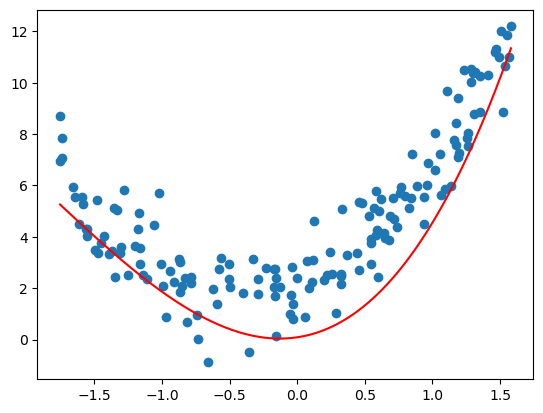

In [50]:
x_line = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1,1)
y_line = pr.predict(x_line)

plt.scatter(X_train[:,0], y_train)
plt.plot(x_line, y_line, color='red')
